### Tarea 06 - Procesamiento de lenguaje natural
### Giovanni Gamaliel López Padilla

#### Punto 1

Estudie los papers de word2vec (a y b). Consteste las siguientes preguntas en sus propias
palabras.

+ 1) ¿Describa en sus propias palabras la estrategia de selección de palabras dentro de la
ventana de contexto en w2v? Explique porque se hace así y cual es la intuición.

    Respuesta 

+ 2) ¿Qué estrategia se usa para construir frases de palabras y construir un solo vector para conceptos basados en más de un token?

    Respuesta

+ 3) ¿Según el autor de w2v, cuales podrían ser las diferencias o ventajas/desventajas de CBOW y Skipgram?

    Respuesta

+ 4) ¿Cuales son las diferencias entre usar Hierachical Softmax, Negative Sampling y NCE? ¿Cuál recomienda el autor y por qué?

    Respuesta
    
+ 5) ¿Cual diría usted que es la principal conclusión y aportación del paper de w2v? ¿Qué crítica haría usted a estos papers de w2v?

    Respuesta

#### Punto 2

Lea el paper de Glove y explique brevemente los siguientes puntos:

+ 1) ¿Qué desventaja trata de solucionar de W2V?

    Respuesta 

+ 2) Describa en sus propias palabras y de manera general cual es la principal estrategia para lograrlo.

    Respuesta

+ 3) Explique en sus propias palabras las principales conclusiones de los experimentos. Co- mente si cree que se logró el objetivo.

    Respuesta

+ 4) ¿Encuentra alguna relación entre Glove y las clasicas TCOR y DOR? ¿Cuáles?

    Respuesta
    
+ 5) ¿Cual diría usted que es la principal conclusión y aportación del paper de Glove? ¿Qué crítica haría usted a este paper de Glove?

    Respuesta

#### Punto 3

Lea los papers de Directional Word2Vec, Fast Text, el de gnome-mining, así como el paper de
CNNs de Kim y conteste.

+ 1) ¿Qué desventaja trata de solucionar FastText y cómo lo logra?

    Respuesta 

+ 2) ¿Cuál sería la principal desventaja de FastText vs Word2Vec?

    Respuesta

+ 3) ¿Qué desventaja trata de solucionar el paper de Directional W2V y cómo lo logra? Describa brevemente las conclusiones de la sección experimental.

    Respuesta

+ 4) ¿Qué se dice acerca del análisis de complejidad del Directional w2v?

    Respuesta
    
+ 5) En el paper de gnome-mining, ¿Qué técnicas de NLP son usadas y con que objetivo intuitivo cada una?

    Respuesta
+ 6) ¿En que problemas de clasificación evaluó Kim su CNN?
 
     Respuesta
     
+ 7) En los resultados dónde estuvo involucrado algún método de clasificación con SVM, ¿Cómo fue el resultado respecto a CNNs? ¿Qué features usaba el método basado en SVM?

    Respuesta
 
+ 8) En sus propias palabras, ¿Qué diferencia tienen las estrategias multi-channel y single-channel?, ¿Cuál recomienda Kim?

    Respuesta
 
+ 9) ¿Cuál diría usted que es la principal conclusión y aportación del paper de Kim? ¿Qué crítica le haría usted a Kim?

    Respuesta
  

#### Punto 4

Estudie superficialmente el siguiente notebook: https://github.com/fagonzalezo/dl-tau-2017-2/blob/master/Handout-CNN-sentence-classification.ipynb En esta tarea se le pro-
porcionará el CNN-rand pero en Pytorch. Investigue lo necesario para completar el CNN-static y el CNN-non-static por usted mismo. Contruya la gŕafica de comparación de los tres.

In [ ]:
from nltk.tokenize import TweetTokenizer as tokeizer
from argparse import Namespace
from os import makedirs
import numpy as np
import random
import torch


def get_params() -> dict:
    """
    Parámetros de las rutas y nombres de los archivos de datos y resultados
    """
    params = {
        "path data": "/content/drive/MyDrive/Lenguaje/Tarea_06/Data",
        "path word2vec": "/content/drive/MyDrive/Lenguaje/Tarea_06/Data/word2vec",
        "file word2vec": "word2vec_col.txt",
        "train data": "mex_train.txt",
        "train labels": "mex_train_labels.txt",
        "test data": "mex_val.txt",
        "test labels": "mex_val_labels.txt",
        "path model": "/content/drive/MyDrive/Lenguaje/Tarea_06/Results",
        "path results": "/content/drive/MyDrive/Lenguaje/Tarea_06/Results",
        "file model": "model_best.pt",
        "stadistics  file": "stadistics.csv",
    }
    return params


def get_args() -> Namespace:
    """
    parámetros para las redes neuronales
    """
    args = Namespace()
    # numero de semilla
    args.seed = 1111
    # maximo vocabulario
    args.max_vocabulary = 5000
    # tokenizer a utilizar
    args.tokenize = tokeizer().tokenize
    # tamaño en porcentaje del test
    args.test_size = 0.1
    args.batch_size = 64
    args.num_workers = 0
    # Maximum sequence length
    args.max_seq_len = 20
    # Model hyperparameters
    args.filter_sizes = [3, 4, 5]
    args.num_filters = 100
    # Training hyperparameters
    args.lr = 1e-2
    args.num_epochs = 40
    args.patience = 10
    # Scheduler hyperparameters
    args.lr_patience = 5
    args.lr_factor = 0.5
    # Dimension of word Embeddings
    args.d = 100
    # Dimension for Hidden Layer
    args.d_h = 200
    args.dropout = 0.1
    # Save directory
    args.savedir = "/content/drive/MyDrive/Lenguaje/Tarea_06/Results"
    makedirs(args.savedir,
             exist_ok=True)
    init_seeds(args)
    return args


def init_seeds(args: Namespace) -> None:
    """
    incrustación de las semillas en cada uno de las librerias a utilizar
    """
    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    torch.backends.cudnn.benchmark = False

Tweet_dataset

In [ ]:
from torch.utils.data import Dataset
from pandas import DataFrame
from torch import LongTensor
from typing import Callable


class TweeterDataset(Dataset):
    """
    Modelo de los datos para la red neuronal
    """

    def __init__(self, x: DataFrame, y: DataFrame, vocabulary: set, word_index: dict, tokenizer: Callable[[str], list], max_seq_len: int):
        self.x = x
        self.y = y
        self.vocabulary = vocabulary
        self.word_index = word_index
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __len__(self):
        """
        tamaño de los datos
        """
        return self.x.shape[0]

    def __getitem__(self, idx):
        """
        obtiene los tokens de una palabra y su clasificacion dado un indice
        """
        # Get sequence of token ids
        sentence = self.x.iloc[idx]
        tokens = [self.word_index[word]
                  for word in self.tokenizer(sentence)
                  if word in self.vocabulary]
        # Truncate sequence up to max_seq_len
        truncate_len = min(len(tokens), self.max_seq_len)
        tokens = tokens[:truncate_len]
        # Get true label
        label = self.y.iloc[idx]
        return LongTensor(tokens), LongTensor([label])

Mex_data

In [ ]:
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from pandas import DataFrame, read_csv
from torch import LongTensor
from argparse import Namespace
from nltk import FreqDist
from os.path import join
from numpy import array


class Mex_data_class:
    def __init__(self, params: dict, args: Namespace) -> None:
        self.params = params
        self.args = args
        self.read()
        self.get_vocabulary()
        self.obtain_loaders()

    def read(self) -> None:
        """
        Lectura de los archivos de datos a partir de su ruta y nombre de archivo
        """
        train_data_filename = join(self.params["path data"],
                                   self.params["train data"])
        train_labels_filename = join(self.params["path data"],
                                     self.params["train labels"])
        test_data_filename = join(self.params["path data"],
                                  self.params["test data"])
        test_labels_filename = join(self.params["path data"],
                                    self.params["test labels"])
        train_text = self.read_file(train_data_filename)
        train_labels = self.read_file(train_labels_filename)
        self.split_data(train_text, train_labels)
        self.test_text = self.read_file(test_data_filename)
        self.test_labels = self.read_file(test_labels_filename)

    def split_data(self, train_data: DataFrame, train_labels: DataFrame) -> None:
        """
        Separación de los datos de entrenamiento y de validación
        """
        self.train_text,  self.validation_text, self.train_labels, self.validation_labels = train_test_split(
            train_data,
            train_labels,
            test_size=self.args.test_size,
            random_state=self.args.seed)

    def read_file(self, filename: str) -> DataFrame:
        """
        lectura estandarizada de los archivos de datos
        """
        data = read_csv(filename,
                        engine="python",
                        sep="\r\n",
                        header=None)
        data = data[0]
        return data

    def get_vocabulary(self) -> None:
        """
        Obtiene el vocabulario de los datos de entrenamiento truncando hasta un maximo de palabras
        """
        # obtiene las frecuencias de cada palabra
        freq_dist = FreqDist([word.lower()
                              for sentence in self.train_text
                              for word in self.args.tokenize(sentence)])
        # Obtiene el numero de palabras a truncuar
        self.max_words = min(self.args.max_vocabulary-1,
                             len(freq_dist))
        # ordena las palabras
        sorted_words = self.sortFreqDict(freq_dist)[:self.max_words]
        self.word_index = {word: i+1
                           for i, word in enumerate(sorted_words)}
        # Append <pad> token with 0 index
        sorted_words.append('<pad>')
        self.word_index['<pad>'] = 0
        self.vocabulary = set(sorted_words)

    def sortFreqDict(self, freq_dist: FreqDist) -> list:
        """
        Orden de las palabras en orden descendente de frecuencia
        """
        freq_dict = dict(freq_dist)
        sorted_words = sorted(freq_dict, key=freq_dict.get, reverse=True)
        return sorted_words

    def obtain_loaders(self) -> None:
        """
        Obtiene los loaders de cada tipo de dato
        """
        self.train_loader = obtain_loader(self.train_text,
                                          self.train_labels,
                                          self.vocabulary,
                                          self.word_index,
                                          self.args)
        self.validation_loader = obtain_loader(self.validation_text,
                                               self.validation_labels,
                                               self.vocabulary,
                                               self.word_index,
                                               self.args)
        self.test_loader = obtain_loader(self.test_text,
                                         self.test_labels,
                                         self.vocabulary,
                                         self.word_index,
                                         self.args)


def collate_fn(batch):
    # Get X
    batch_tokens = [row[0]
                    for row in batch]
    # Get y
    batch_labels = LongTensor([row[1]
                               for row in batch]).to(float)
    # Pad with 0 (to the rigth) shorter sequences than max_seq_len
    padded_batch_tokens = pad_sequence(batch_tokens,
                                       batch_first=True)
    return padded_batch_tokens, batch_labels.unsqueeze(1)


def obtain_loader(data: array, labels: array, vocabulary: set, word_index: dict, args: Namespace) -> DataLoader:
    dataset = TweeterDataset(data,
                             labels,
                             vocabulary,
                             word_index,
                             args.tokenize,
                             args.max_seq_len)
    loader = DataLoader(dataset,
                        batch_size=args.batch_size,
                        num_workers=args.num_workers,
                        collate_fn=collate_fn,
                        shuffle=True)
    return loader

nn_models

In [ ]:
from sklearn.metrics import accuracy_score
from argparse import Namespace
from pandas import DataFrame
from shutil import copyfile
from os.path import join
from numpy import mean
import torch.nn as nn
import torch
import time


class CNNTextCls(nn.Module):
    def __init__(self, args, embeddings=None, freeze=False):
        super(CNNTextCls, self).__init__()
        if embeddings is not None:
            self.emb = nn.Embedding.from_pretrained(
                torch.FloatTensor(embeddings))
            if freeze:
                self.emb.weight.requires_grad = False
        else:
            self.emb = nn.Embedding(args.max_vocabulary, args.d)
        conv_block_list = []
        for k in args.filter_sizes:
            conv_block = nn.Sequential(
                nn.Conv1d(in_channels=args.d,
                          out_channels=args.num_filters, kernel_size=k, stride=1),
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=(args.max_seq_len-k+1))
            )
            conv_block_list.append(conv_block)
        self.conv_block_list = nn.ModuleList(conv_block_list)
        self.dropout = nn.Dropout(args.dropout)
        self.fc = nn.Linear(args.num_filters*len(args.filter_sizes), 1)

    def forward(self, x):
        '''
        B: batch size
        L: sequence length
        D: embedding dim
        C: Convolution output channels (number of filters)
        k: Convolution kernel size
        N: Number of convolution blocks

        x shape: (B, L)
        '''
        # (B, L, D)
        x = self.emb(x)
        # (B, D, L) conv1d expects L in last dimension
        x = x.transpose(1, 2)
        x_filter = []
        # Conv1d -> ReLU -> MaxPool1d
        for conv_block in self.conv_block_list:
            # (B, C, L-k+1) -> ReLU -> (B, C, 1) -> (B, C) after squeeze
            x_filter.append(conv_block(x).squeeze(2))
        x_cat = torch.cat(x_filter, dim=1)  # (B, C*N)
        x = self.dropout(x_cat)
        return self.fc(x)


class model_class:
    """
    Modelo que realiza la ejeccución del entrenamiento de la red neuronal dada su estructura y datos
    """

    def __init__(self, model: CNNTextCls, args: Namespace, train_loader, validation_loader):
        self.validation_loader = validation_loader
        self.train_loader = train_loader
        self.model = model
        self.args = args

    def get_pred(self, outputs) -> torch.Tensor:
        result = torch.round(torch.sigmoid(outputs.detach())).cpu().numpy()
        return result

    def model_eval(self, data, gpu=False):
        with torch.no_grad():
            preds, tgts = [], []
            for input, labels in data:
                if gpu:
                    input = input.cuda()
                outputs = self.model(input)
                # Get prediction for Accuracy
                y_pred = self.get_pred(outputs)
                tgt = labels.numpy()
                tgts.append(tgt)
                preds.append(y_pred)
        tgts = [e for l in tgts for e in l]
        preds = [e for l in preds for e in l]
        metrics = {
            "accuracy": accuracy_score(tgts, preds),
        }
        return metrics

    def save_checkpoint(self, state,
                        is_best: bool,
                        checkpoint_path: str,
                        filename: str = 'checkpoint.pt',
                        best_model_name: str = 'model_best.pt') -> None:
        name = join(checkpoint_path,
                    filename)
        torch.save(state,
                   name)
        if is_best:
            filename_best = join(checkpoint_path,
                                 best_model_name)
            copyfile(name,
                     filename_best)

    def run(self) -> DataFrame:
        """
        Ejecuta el entrenamiento de la red neuronal, regresa un dataframe con las estadisticas del entrenamiento
        """
        stadistics = DataFrame(columns=["Train acc",
                                        "Loss",
                                        "Val acc",
                                        "Time"])
        best_metric = 0
        metric_history = []
        train_metric_history = []
        criterion, optimizer, scheduler = init_models_parameters(self.model,
                                                                 self.args)
        for epoch in range(self.args.num_epochs):
            epoch_start_time = time.time()
            loss_epoch = []
            training_metric = []
            self.model.train()
            for input, labels in self.train_loader:
                # If GPU available
                if self.args.use_gpu:
                    input = input.cuda()
                    labels = labels.cuda()
                # Forward pass
                outputs = self.model(input)
                loss = criterion(outputs, labels)
                loss_epoch.append(loss.item())
                # Get Trainning Metrics
                preds = self.get_pred(outputs)
                tgt = labels.cpu().numpy()
                training_metric.append(accuracy_score(tgt, preds))
                # Backward and Optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            # Get Metric in Trainning Dataset
            mean_epoch_metric = mean(training_metric)
            train_metric_history.append(mean_epoch_metric)
            # Get Metric in Validation Dataset
            self.model.eval()
            tuning_metric = self.model_eval(self.validation_loader,
                                            self.args.use_gpu)
            metric_history.append(tuning_metric["accuracy"])
            # Update Scheduler
            scheduler.step(tuning_metric["accuracy"])
            # Check for Metric Improvement
            is_improvement = tuning_metric["accuracy"] > best_metric
            if is_improvement:
                best_metric = tuning_metric["accuracy"]
                n_no_improve = 0
            else:
                n_no_improve += 1
            # Save best model if metric improved
            state = {
                'epoch': epoch + 1,
                'state_dict': self.model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                'best_metric': best_metric, }
            self.save_checkpoint(
                state,
                is_improvement,
                self.args.savedir,
            )
            # Early stopping
            if n_no_improve >= self.args.patience:
                print('No improvement. Breaking out of loop')
                break
            finish_time = time.time()-epoch_start_time
            stadistics.loc[epoch+1] = [mean_epoch_metric,
                                       mean(loss_epoch),
                                       tuning_metric["accuracy"],
                                       finish_time]
            print('Epoch[{}/{}], Loss : {:4f} - Train Accuracy: {:.4f} - Val accuracy: {:4f} - Epoch time: {:2f}'.format(
                epoch + 1,
                self.args.num_epochs,
                mean(loss_epoch),
                mean_epoch_metric,
                tuning_metric["accuracy"],
                finish_time))
        return stadistics


def init_models_parameters(model: CNNTextCls, args: Namespace) -> tuple:
    args.use_gpu = torch.cuda.is_available()
    if args.use_gpu:
        model.cuda()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(),
                                lr=args.lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                           "max",
                                                           patience=args.lr_patience,
                                                           verbose=True,
                                                           factor=args.lr_factor)
    return criterion, optimizer, scheduler


def save_stadistics(params: dict, stadistics: DataFrame) -> None:
    filename = join(params["path results"],
                    params["stadistics  file"])
    stadistics.index.name = "Epoch"
    stadistics.to_csv(filename)

In [ ]:
from pandas import DataFrame, read_csv
from numpy.random import normal
from argparse import Namespace
from os.path import join
from numpy import array


class word2vec_class:
    """
    Modelo que lee y crea la matriz de embeddings de word2vec
    """

    def __init__(self, params: dict, args: Namespace) -> None:
        self.params = params
        self.args = args
        self.read()

    def read(self) -> None:
        """
        lectura de los embeddings de word2vec
        """
        filename = join(self.params["path word2vec"],
                        self.params["file word2vec"])
        data = read_csv(filename,
                        sep=" ",
                        skiprows=1,
                        header=0,
                        index_col=0)
        data = data.T
        self.vector_size = len(data)
        self.data = self.to_dict(data)

    def to_dict(self, data: DataFrame) -> dict:
        """
        creacion de un diccionario, las keys son las palabras de los diccionario y su valor es el vector de representacion
        """
        return data.to_dict("list")

    def obtain_embedding_matrix(self, Mex_data: Mex_data_class) -> array:
        """
        crea la matriz de embeddings de word2vec
        """
        matrix = normal(0, 1, size=(
            self.args.max_vocabulary, self.vector_size))
        for word in Mex_data.word_index:
            if word in self.data:
                id = Mex_data.word_index[word]
                matrix[id] = array(self.data[word], dtype=float)
        return matrix

In [ ]:
# Inicializacion de los datos y parametros a utilizar
params = get_params()
args = get_args()
data = Mex_data_class(params, args)

In [ ]:
# Creacion de la red neuronal CNN rand
CNN_model = CNNTextCls(args)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# entrenamiento del modelo
stadistics = model.run()
save_stadistics(params,
                stadistics)

Epoch[1/40], Loss : 0.657614 - Train Accuracy: 0.6278 - Val accuracy: 0.673874 - Epoch time: 0.750887
Epoch[2/40], Loss : 0.641914 - Train Accuracy: 0.6418 - Val accuracy: 0.675676 - Epoch time: 0.707470
Epoch[3/40], Loss : 0.626532 - Train Accuracy: 0.6522 - Val accuracy: 0.681081 - Epoch time: 0.744810
Epoch[4/40], Loss : 0.613732 - Train Accuracy: 0.6604 - Val accuracy: 0.690090 - Epoch time: 0.709496
Epoch[5/40], Loss : 0.596456 - Train Accuracy: 0.6811 - Val accuracy: 0.691892 - Epoch time: 0.698423
Epoch[6/40], Loss : 0.578062 - Train Accuracy: 0.7009 - Val accuracy: 0.700901 - Epoch time: 0.710534
Epoch[7/40], Loss : 0.566401 - Train Accuracy: 0.7118 - Val accuracy: 0.708108 - Epoch time: 0.769804
Epoch[8/40], Loss : 0.541413 - Train Accuracy: 0.7376 - Val accuracy: 0.717117 - Epoch time: 0.719531
Epoch[9/40], Loss : 0.533380 - Train Accuracy: 0.7422 - Val accuracy: 0.736937 - Epoch time: 0.705789
Epoch[10/40], Loss : 0.515176 - Train Accuracy: 0.7566 - Val accuracy: 0.727928 - 

In [ ]:
# lectura y creacion de la matriz de embeddings de word2vec
word2vec_model = word2vec_class(params, args)
embedding = word2vec_model.obtain_embedding_matrix(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [ ]:
# Creacion de la red neuronal CNN non static
params["stadistics  file"] = "stadistics_non_static.csv"
CNN_model = CNNTextCls(args, embeddings=embedding)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# ejecuccion del entrenamiento
stadistics = model.run()
save_stadistics(params,
                stadistics)

Epoch[1/40], Loss : 1.180286 - Train Accuracy: 0.5861 - Val accuracy: 0.684685 - Epoch time: 0.663403
Epoch[2/40], Loss : 0.722752 - Train Accuracy: 0.6605 - Val accuracy: 0.630631 - Epoch time: 0.668103
Epoch[3/40], Loss : 0.598847 - Train Accuracy: 0.7056 - Val accuracy: 0.715315 - Epoch time: 0.689001
Epoch[4/40], Loss : 0.522192 - Train Accuracy: 0.7444 - Val accuracy: 0.727928 - Epoch time: 0.666950
Epoch[5/40], Loss : 0.479302 - Train Accuracy: 0.7742 - Val accuracy: 0.744144 - Epoch time: 0.668978
Epoch[6/40], Loss : 0.442707 - Train Accuracy: 0.7960 - Val accuracy: 0.708108 - Epoch time: 0.658549
Epoch[7/40], Loss : 0.416779 - Train Accuracy: 0.8122 - Val accuracy: 0.747748 - Epoch time: 0.735564
Epoch[8/40], Loss : 0.402304 - Train Accuracy: 0.8172 - Val accuracy: 0.745946 - Epoch time: 0.649564
Epoch[9/40], Loss : 0.359855 - Train Accuracy: 0.8448 - Val accuracy: 0.744144 - Epoch time: 0.644365
Epoch[10/40], Loss : 0.339072 - Train Accuracy: 0.8563 - Val accuracy: 0.745946 - 

In [ ]:
# Creacion de la red neuronal CNN static
params["stadistics  file"] = "stadistics_static.csv"
CNN_model = CNNTextCls(args,
                       embeddings=embedding,
                       freeze=True)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# ejecucción del entrenamiento de la red neuronal
stadistics = model.run()
save_stadistics(params,
                stadistics)

Epoch[1/40], Loss : 1.251023 - Train Accuracy: 0.5723 - Val accuracy: 0.731532 - Epoch time: 0.675061
Epoch[2/40], Loss : 0.688519 - Train Accuracy: 0.6639 - Val accuracy: 0.749550 - Epoch time: 0.663114
Epoch[3/40], Loss : 0.571176 - Train Accuracy: 0.7158 - Val accuracy: 0.745946 - Epoch time: 0.644114
Epoch[4/40], Loss : 0.508751 - Train Accuracy: 0.7520 - Val accuracy: 0.704505 - Epoch time: 0.650658
Epoch[5/40], Loss : 0.491814 - Train Accuracy: 0.7593 - Val accuracy: 0.769369 - Epoch time: 0.648120
Epoch[6/40], Loss : 0.443856 - Train Accuracy: 0.7884 - Val accuracy: 0.758559 - Epoch time: 0.651300
Epoch[7/40], Loss : 0.413367 - Train Accuracy: 0.8112 - Val accuracy: 0.760360 - Epoch time: 0.649086
Epoch[8/40], Loss : 0.399510 - Train Accuracy: 0.8198 - Val accuracy: 0.769369 - Epoch time: 0.641960
Epoch[9/40], Loss : 0.376356 - Train Accuracy: 0.8332 - Val accuracy: 0.771171 - Epoch time: 0.673098
Epoch[10/40], Loss : 0.352956 - Train Accuracy: 0.8454 - Val accuracy: 0.765766 - 

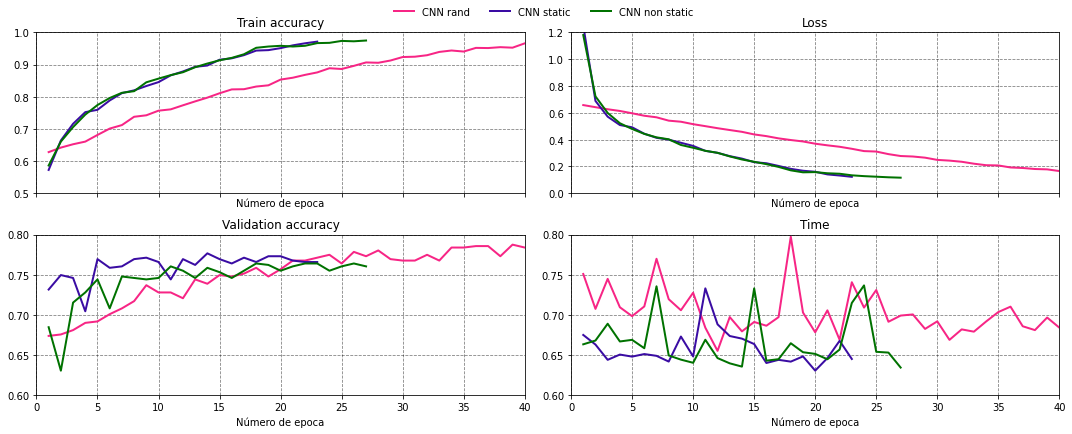

In [ ]:
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import linspace

files = {"stadistics.csv": {"name": "CNN rand",
                            "color": "#f72585"},
         "stadistics_static.csv": {"name": "CNN static",
                                   "color": "#3a0ca3"},
         "stadistics_non_static.csv": {"name": "CNN non static",
                                       "color": "#007200",
                                       }}
parameters = {"Train acc": {"title": "Train accuracy",
                            "y lim": [0.5, 1]},
              "Loss": {"title": "Loss",
                       "y lim": [0, 1.2]},
              "Val acc": {"title": "Validation accuracy",
                          "y lim": [0.6, 0.8]},
              "Time": {"title": "Time",
                       "y lim": [0.6, 0.8]}}
results = {}
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15, 6))
axs = axs.flatten()
for filename in files:
    model_name = files[filename]["name"]
    color = files[filename]["color"]
    filename = join(params["path results"],
                    filename)
    data = read_csv(filename,
                    index_col=0)
    for ax, parameter in zip(axs, parameters):
        dataset = parameters[parameter]
        ax.set_xlim(0, 40)
        ax.set_ylim(dataset["y lim"][0],
                    dataset["y lim"][1])
        ax.set_xticks(linspace(0, 40, 9))
        ax.set_title(dataset["title"])
        ax.set_xlabel("Número de epoca")
        ax.plot(data.index,
                data[parameter],
                label=model_name,
                color=color,
                lw=2,)
        ax.grid(ls="--",
                color="#000000",
                alpha=0.5)
plt.tight_layout()
lines, labels = ax.get_legend_handles_labels()
fig.legend(lines,
           labels,
           frameon=False,
           ncol=3,
           bbox_to_anchor=(0.65, 1.01),
           )
plt.show()